<a href="https://colab.research.google.com/github/lhs7091/PythonDataScienceExam/blob/master/bluehouse_civil_suggetion/01_civil_suggestions_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# refer to https://github.com/corazzon/petitionWrangling.git

In [2]:
import pandas as pd

In [0]:
!cp ./drive/My\ Drive/Colab\ Notebooks/bluehouse/petition.csv /content/

In [0]:
!ls -l /content

total 529496
drwx------ 3 root root      4096 Feb 11 11:38 drive
-rw------- 1 root root 542189403 Feb 11 11:42 petition.csv
drwxr-xr-x 1 root root      4096 Feb  5 18:37 sample_data


In [3]:
petitions = pd.read_csv('./petition.csv', index_col=0, parse_dates=['start', 'end'])

In [4]:
petitions.shape

(395547, 7)

In [5]:
petitions.head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [6]:
petitions.tail()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [7]:
petitions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395547 entries, 21 to 517122
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   start     395547 non-null  datetime64[ns]
 1   end       395547 non-null  datetime64[ns]
 2   answered  395547 non-null  int64         
 3   votes     395547 non-null  int64         
 4   category  395547 non-null  object        
 5   title     395547 non-null  object        
 6   content   395546 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 24.1+ MB


In [8]:
# check count, mean, std, min, max of int type data
petitions.describe()

,answered,votes
count,395547.000000,3.955470e+05
mean,0.000073,1.501188e+02
std,0.008562,4.802583e+03
min,0.000000,0.000000e+00
25%,0.000000,2.000000e+00
50%,0.000000,5.000000e+00
75%,0.000000,1.500000e+01
max,1.000000,1.192049e+06


In [9]:
petitions['votes'].mean()

150.11881773847355

In [10]:
petitions['votes'].max()

1192049

### check NULL value in data

In [11]:
petitions.isnull().sum()

start       0
end         0
answered    0
votes       0
category    0
title       0
content     1
dtype: int64

In [12]:
petitions['answer'] = (petitions['votes'] > 200000) == 1

In [13]:
petitions.shape

(395547, 8)

In [14]:
petitions.head()

,start,end,answered,votes,category,title,content,answer
article_id,,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...,False
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False


### Proposal duration check and input column

In [15]:
petitions['duration'] = petitions['end'] - petitions['start']
petitions.sort_values('duration', ascending=True).head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
12781,2017-09-08,2017-09-15,0,0,육아/교육,청소년,동의합니다,False,7 days
10813,2017-09-06,2017-09-13,0,0,안전/환경,청소년보호법폐지해주세요,갈수록 영악해지고 잔인해지는 청소년들의 범죄예방을 위해 꼭폐지되어야한다고 생각합니다...,False,7 days
10816,2017-09-06,2017-09-13,0,1,인권/성평등,청소년보호법 폐지해야합니다!,이번 부산 사하 여중생 폭행사건으로 인하여 청소년이라는 이유로 범죄자인데 처벌을 약...,False,7 days


In [16]:
petitions['duration'].value_counts()

30 days    384347
90 days      6754
7 days       2436
15 days      1204
60 days       806
Name: duration, dtype: int64

### duration is 90days and needs answers

In [17]:
petitions.loc[(petitions['duration'] == '90 days') & (petitions['answer'] == 1)]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days


### duration is 60days and needs answers

In [18]:
petitions_60_answer = petitions.loc[(petitions['duration'] == '60 days') & (petitions['answer'] == 1)]
print(petitions_60_answer.shape)
petitions_60_answer.head()

(1, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days


### duration is 30days and needs answers

In [19]:
petitions_30_answer = petitions.loc[(petitions['duration'] == '30 days') & (petitions['answer'] == 1)]
print(petitions_30_answer.shape)
petitions_30_answer.head()

(78, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days
49083,2017-11-24,2017-12-24,1,211064,기타,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",True,30 days
57132,2017-12-03,2018-01-02,1,255554,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2017년 1월 28일부터 시행되는 법령으로 국가기술표준원에서 관리하는 전기제품에만...,True,30 days


### duration is 7days and needs answers

In [21]:
petitions_7_answer = petitions.loc[(petitions['duration'] == '70 days') & (petitions['answer'] == 1)]
print(petitions_7_answer.shape)

petitions_7 = petitions.loc[(petitions['duration'] == '7 days')]
print(petitions_7.shape)

petitions_7_count = petitions_7['start'].value_counts().reset_index()
petitions_7_count.columns = ['start', 'count']
petitions_7_count.sort_values('start', ascending=True)

(0, 9)
(2436, 9)


,start,count
25,2017-08-19,9
22,2017-08-20,18
17,2017-08-21,21
23,2017-08-22,15
16,2017-08-23,22
21,2017-08-24,18
19,2017-08-25,20
20,2017-08-26,19
24,2017-08-27,11
15,2017-08-28,24


### Which field has the most petitions received?

In [22]:
category = pd.DataFrame(petitions['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


### The day when the petition came in the most cases

In [23]:
start_df = pd.DataFrame(petitions['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('total petition: {}'.format(start_df.shape[0]))
start_df.head()

total petition: 535


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


In [26]:
pd.pivot_table?

### View the field with the most votes by pivot table

In [25]:
import numpy as np
petitions_unique = pd.pivot_table(petitions, index=['category'], aggfunc=np.sum)
petitions_best = petitions_unique.sort_values(by='votes', ascending=False).reset_index()
petitions_best

,category,answer,answered,votes
0,인권/성평등,24.0,9,12559348
1,안전/환경,10.0,2,6605175
2,정치개혁,8.0,2,6205013
3,기타,8.0,1,5190468
4,육아/교육,3.0,1,4475297
5,보건복지,3.0,2,4341211
6,문화/예술/체육/언론,7.0,4,4149796
7,외교/통일/국방,4.0,1,3696112
8,교통/건축/국토,3.0,2,2902330
9,반려동물,4.0,0,2066624


In [30]:
petitions_start = pd.pivot_table(petitions, index=['start'], aggfunc=np.sum)
votes_df = petitions_start.sort_values(by='votes', ascending=False)
votes_df.loc[petitions_start['votes'] > 350000 ]

,answer,answered,votes
start,,,
2018-10-17,1.0,0,1300523
2018-10-31,2.0,0,827096
2018-06-13,1.0,0,786157
2018-10-18,2.0,0,721524
2018-02-19,1.0,1,701520
2018-11-09,2.0,0,672819
2018-07-22,1.0,0,672491
2017-09-06,1.0,1,648209
2018-06-24,2.0,0,628925


In [42]:
petitions[petitions['start'] == '2018-10-17'].sort_values(by='votes', ascending=True) 

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
409675,2018-10-17,2018-11-16,0,0,안전/환경,Womad사이트 접속자 pc든 스마트폰든 감시 하라!,워마드 메갈년들이 요즘 남짓하면서 오픈톡/라인으로 친한척 접근하다가 남자 사진 보내...,False,30 days
408883,2018-10-17,2018-11-16,0,0,일자리,세요,북한에만신경써주지마시고요국내경제쫌살려주세요,False,30 days
409174,2018-10-17,2018-11-16,0,0,안전/환경,소방공무원 이상한 신체기준...,어찌하여 고혈합 환자는 약먹으면 소방공무원신체검사 통과하고 안경 낀 눈 나쁜 사...,False,30 days
408848,2018-10-17,2018-11-16,0,0,인권/성평등,서비스업 수준 개선,외식업 수준개선을 요구합니다.\n사장과 직원의 불친절.\n이용하는 손님 고객의 진...,False,30 days
408846,2018-10-17,2018-11-16,0,0,기타,기사에서 좋지 않은 내용일경우 법적으로 지역을 기재하지 못하도록 해주세요.,우편향된 특정 신문사 및... 인터넷 기자들이\n호남지역에 좋지 않은 사건의 경우만...,False,30 days
...,...,...,...,...,...,...,...,...,...
408885,2018-10-17,2018-11-16,0,3484,외교/통일/국방,"*(긴급)제주 예맨 난민 339명 인도적체류 허가, 이게 정부냐",결국엔 모두 인도체류로 출도해제로 전국 어디로 갈수 있게 만들었다\n정부는...,False,30 days
408759,2018-10-17,2018-11-16,0,4611,외교/통일/국방,[긴급]피지에 있는 400여명을 살려 주세요,제발 도와주십시오.\n피지에서 현대판 노예생활을 하고 있는 400여명을 제발 구해주...,False,30 days
409477,2018-10-17,2018-11-16,0,5831,육아/교육,영양교사 제도를 폐지하고 본래의 식품위생직 공무원 선발로 환원해 주시기 바랍니다.,청원에 앞서 학교에서 따뜻하게 밥 한 끼를 만들어주시는 급식종사자 여러분들 그리고 ...,False,30 days


### the day the most petitions vs votes

In [43]:
votes_df = votes_df.reset_index()
votes_df.head()

,start,answer,answered,votes
0,2018-10-17,1.0,0,1300523
1,2018-10-31,2.0,0,827096
2,2018-06-13,1.0,0,786157
3,2018-10-18,2.0,0,721524
4,2018-02-19,1.0,1,701520


<Figure size 432x288 with 0 Axes>

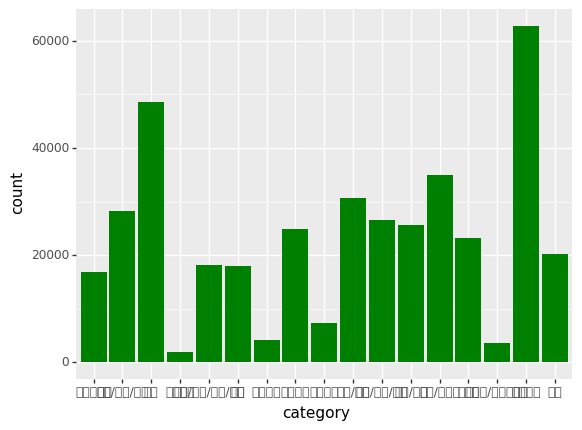

<ggplot: (-9223372036546974176)>

In [58]:
import warnings
warnings.filterwarnings('ignore')
from plotnine import *
import matplotlib.pyplot as plt
fig = plt.figure()

(ggplot(petitions) + aes('category') + geom_bar(fill='green'))

### set Fonts for ggplot by matplotlib

In [77]:
%config InlineBackend.fiture_format='retina'

import matplotlib.font_manager as fm
fontpath = '/Library/Fonts/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [78]:
import matplotlib as mpl
mpl.font_manager._rebuild()
# setting fond on mac
mpl.rc("font", family="AppleGothic")

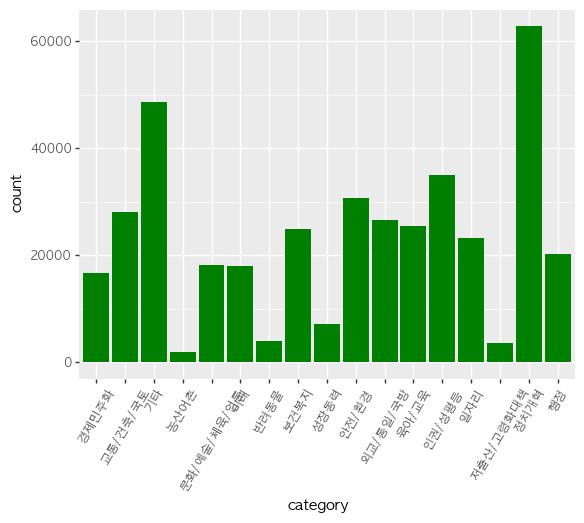

<ggplot: (301656605)>

In [79]:
(ggplot(petitions) + aes('category') + geom_bar(fill='green')
+ theme(text=element_text(family="AppleGothic"), 
        axis_text_x=element_text(rotation=60)))